In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
# Apple file path/ read data
apple_data_path = "Resources/applemobilitytrends-2020-09-27.csv"
apple_data = pd.read_csv(apple_data_path)




/Users/QueenV/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create DataFrame to restrict data to LA, SF, and US
refined_data = apple_data.loc[(apple_data["region"] == "San Francisco County")|
                              (apple_data["region"] == "Los Angeles County") |
                              (apple_data["region"] == "United States")
                             ]
refined_data.head(9)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27
146,country/region,United States,driving,USA,NaN,NaN,100.0,102.97,105.19,108.48,...,159.07,157.73,117.62,119.61,121.24,124.19,129.45,154.70,153.19,115.83
147,country/region,United States,transit,USA,NaN,NaN,100.0,97.77,98.84,99.04,...,64.19,64.36,53.23,55.81,55.76,56.62,57.08,64.61,64.15,52.27
148,country/region,United States,walking,USA,NaN,NaN,100.0,99.59,101.87,100.60,...,153.53,167.31,112.50,111.83,114.71,117.62,121.53,152.17,166.75,111.27
3464,county,Los Angeles County,driving,NaN,California,United States,100.0,105.94,112.85,111.09,...,127.25,117.89,92.81,98.13,100.91,102.89,106.06,124.77,114.79,90.59
3465,county,Los Angeles County,transit,NaN,California,United States,100.0,103.75,105.56,102.86,...,54.37,47.93,40.57,50.04,48.61,48.69,48.61,53.63,46.24,40.58
3466,county,Los Angeles County,walking,NaN,California,United States,100.0,106.17,110.72,109.54,...,127.99,135.07,102.50,98.69,100.50,102.32,104.66,125.46,131.65,100.24
4140,county,San Francisco County,driving,NaN,California,United States,100.0,104.71,104.32,101.92,...,93.03,99.15,79.41,71.85,72.91,79.17,79.62,94.41,99.95,84.06
4141,county,San Francisco County,transit,NaN,California,United States,100.0,103.19,106.68,101.18,...,31.22,30.82,24.80,27.08,25.48,27.39,26.79,30.20,31.82,27.51
4142,county,San Francisco County,walking,NaN,California,United States,100.0,107.12,92.61,61.39,...,37.90,46.10,33.64,28.38,29.67,30.50,30.38,38.83,48.83,37.03


In [4]:
# Drop columns in DataFrame not relevent to analysis/ rename columns
data_clean = refined_data.drop(columns = ["geo_type", "alternative_name", "sub-region", "country"])
data_clean.head()

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27
146,United States,driving,100.0,102.97,105.19,108.48,125.51,115.04,90.91,102.57,...,159.07,157.73,117.62,119.61,121.24,124.19,129.45,154.70,153.19,115.83
147,United States,transit,100.0,97.77,98.84,99.04,108.03,97.41,85.40,92.39,...,64.19,64.36,53.23,55.81,55.76,56.62,57.08,64.61,64.15,52.27
148,United States,walking,100.0,99.59,101.87,100.60,121.36,132.38,100.10,94.79,...,153.53,167.31,112.50,111.83,114.71,117.62,121.53,152.17,166.75,111.27
3464,Los Angeles County,driving,100.0,105.94,112.85,111.09,127.76,121.16,92.43,100.56,...,127.25,117.89,92.81,98.13,100.91,102.89,106.06,124.77,114.79,90.59
3465,Los Angeles County,transit,100.0,103.75,105.56,102.86,109.19,93.60,77.38,94.02,...,54.37,47.93,40.57,50.04,48.61,48.69,48.61,53.63,46.24,40.58


In [5]:
# Renaming columns
data_clean.rename(columns = {"transportation_type":"Transportation Type",
                            "region":"Region"}, inplace=True)


In [6]:
data_clean.count()

Region                 9
Transportation Type    9
2020-01-13             9
2020-01-14             9
2020-01-15             9
                      ..
2020-09-23             9
2020-09-24             9
2020-09-25             9
2020-09-26             9
2020-09-27             9
Length: 261, dtype: int64

In [7]:
# Resetting DataFrame index
data_clean.reset_index(inplace=True)

In [8]:
# Drop index column 
data_clean.drop(columns= "index", inplace = True)

In [9]:
data_clean.head(9)

,Region,Transportation Type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27
0,United States,driving,100.0,102.97,105.19,108.48,125.51,115.04,90.91,102.57,...,159.07,157.73,117.62,119.61,121.24,124.19,129.45,154.70,153.19,115.83
1,United States,transit,100.0,97.77,98.84,99.04,108.03,97.41,85.40,92.39,...,64.19,64.36,53.23,55.81,55.76,56.62,57.08,64.61,64.15,52.27
2,United States,walking,100.0,99.59,101.87,100.60,121.36,132.38,100.10,94.79,...,153.53,167.31,112.50,111.83,114.71,117.62,121.53,152.17,166.75,111.27
3,Los Angeles County,driving,100.0,105.94,112.85,111.09,127.76,121.16,92.43,100.56,...,127.25,117.89,92.81,98.13,100.91,102.89,106.06,124.77,114.79,90.59
4,Los Angeles County,transit,100.0,103.75,105.56,102.86,109.19,93.60,77.38,94.02,...,54.37,47.93,40.57,50.04,48.61,48.69,48.61,53.63,46.24,40.58
5,Los Angeles County,walking,100.0,106.17,110.72,109.54,132.77,153.23,117.09,107.48,...,127.99,135.07,102.50,98.69,100.50,102.32,104.66,125.46,131.65,100.24
6,San Francisco County,driving,100.0,104.71,104.32,101.92,121.95,135.84,100.80,92.87,...,93.03,99.15,79.41,71.85,72.91,79.17,79.62,94.41,99.95,84.06
7,San Francisco County,transit,100.0,103.19,106.68,101.18,119.94,118.98,98.29,99.14,...,31.22,30.82,24.80,27.08,25.48,27.39,26.79,30.20,31.82,27.51
8,San Francisco County,walking,100.0,107.12,92.61,61.39,82.63,109.25,77.05,64.31,...,37.90,46.10,33.64,28.38,29.67,30.50,30.38,38.83,48.83,37.03


In [10]:
# Tidy data to long form
clean_data_long = data_clean.melt(id_vars=["Region", "Transportation Type"], var_name="Date", value_name="Activity")
clean_data_long.head()

,Region,Transportation Type,Date,Activity
0,United States,driving,2020-01-13,100.0
1,United States,transit,2020-01-13,100.0
2,United States,walking,2020-01-13,100.0
3,Los Angeles County,driving,2020-01-13,100.0
4,Los Angeles County,transit,2020-01-13,100.0


In [11]:
# Correct values for baseline in Activity column and add to DataFrame
clean_data_corrected = clean_data_long["Activity"] - 100 
clean_data_long["Mobility"] = clean_data_corrected
clean_data_long.head()

,Region,Transportation Type,Date,Activity,Mobility
0,United States,driving,2020-01-13,100.0,0.0
1,United States,transit,2020-01-13,100.0,0.0
2,United States,walking,2020-01-13,100.0,0.0
3,Los Angeles County,driving,2020-01-13,100.0,0.0
4,Los Angeles County,transit,2020-01-13,100.0,0.0


In [12]:
# Check to see if there is any duplicate date points
duplicate_data = clean_data_long.loc[clean_data_long.duplicated(["Region", "Transportation Type", "Date"])]
len(duplicate_data)

0

In [13]:
# Create Dataframe for driving and plot
driving_df = clean_data_long.loc[clean_data_long["Transportation Type"] == "driving"]

<IPython.core.display.Javascript object>


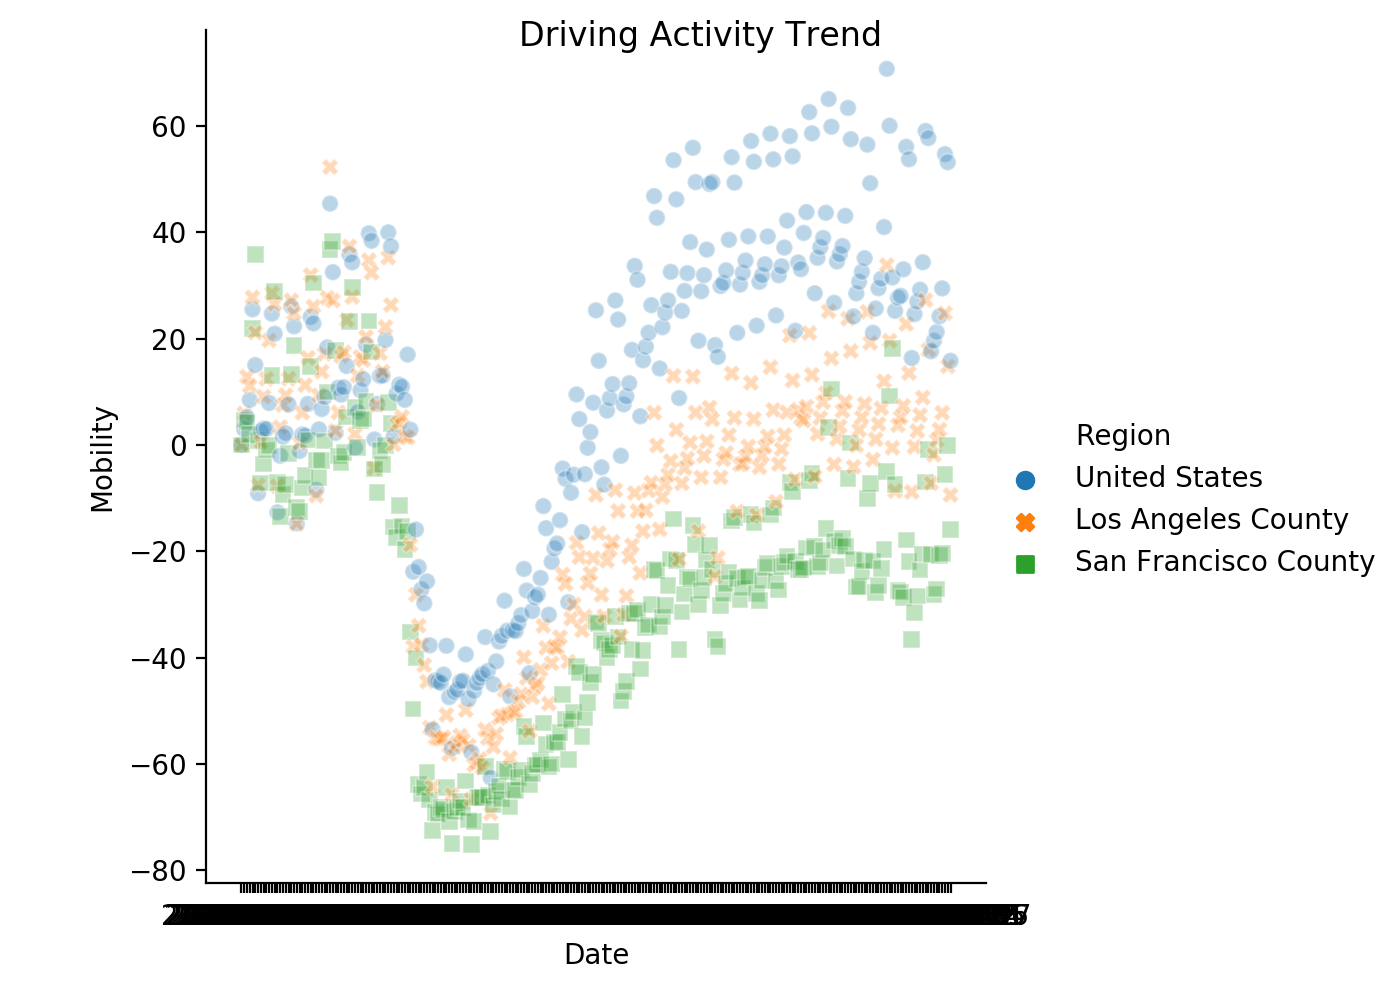

Text(0.5, 0.98, 'Driving Activity Trend')

In [14]:
# Plot for Driving
driving_plot = sns.relplot(data=driving_df, x="Date", y="Mobility", hue="Region", kind="scatter", style="Region", alpha=0.3)
driving_plot.fig.suptitle("Driving Activity Trend")

In [15]:
# Create Dataframe for transit and plot
transit_df = clean_data_long.loc[clean_data_long["Transportation Type"] == "transit"]
dup_transit = transit_df.loc[transit_df.duplicated(["Region", "Date"])]
len(dup_transit)

0

<IPython.core.display.Javascript object>


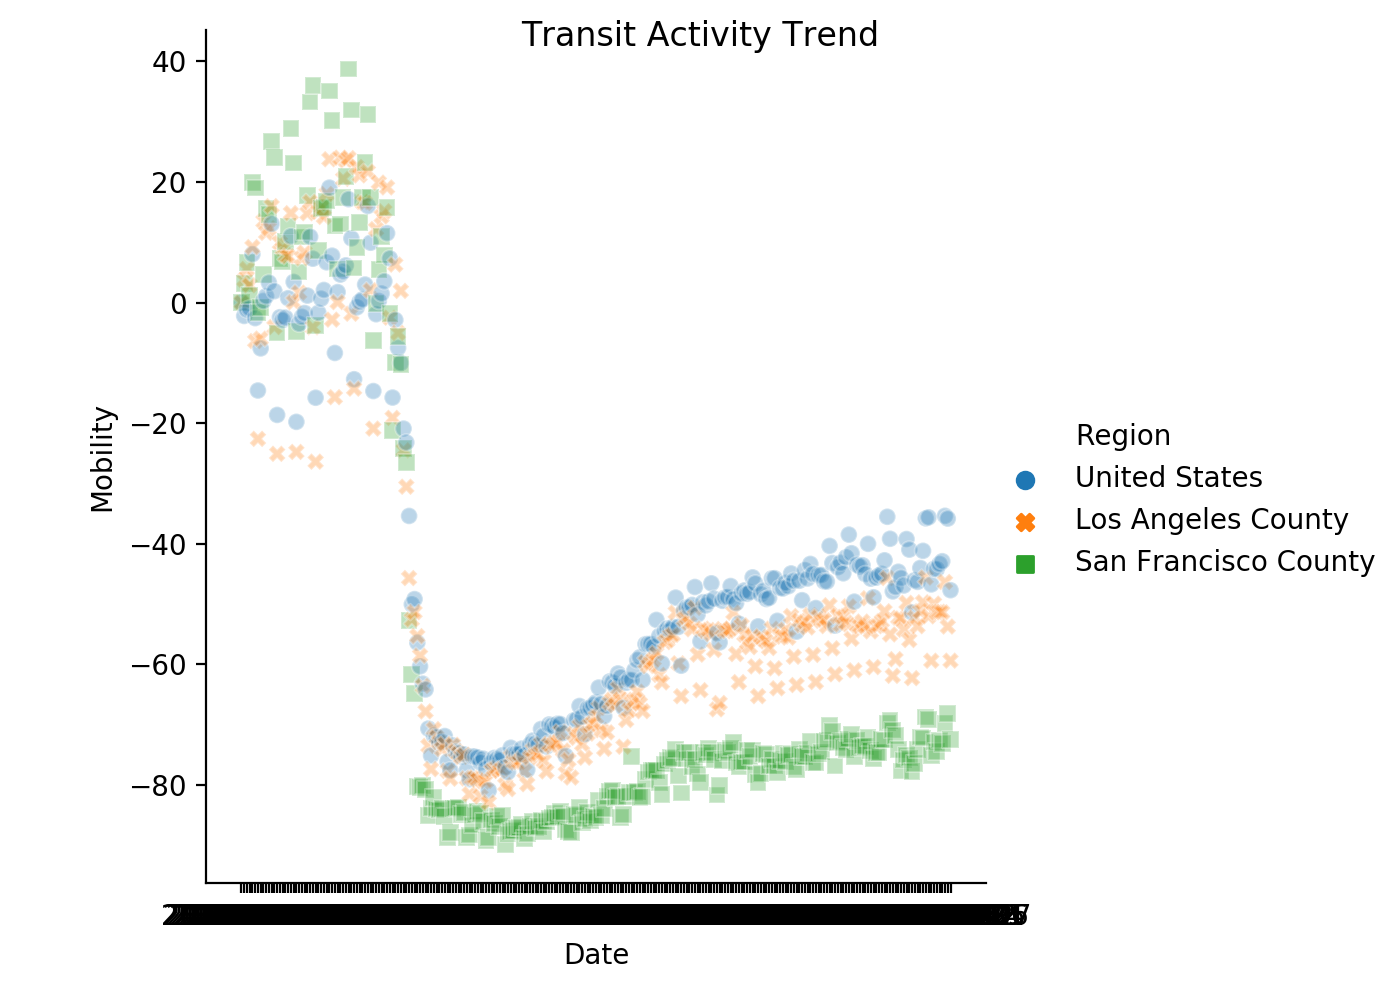

Text(0.5, 0.98, 'Transit Activity Trend')

In [16]:
# Plot for transit
transit_plot = sns.relplot(data=transit_df, x="Date", y="Mobility", hue="Region", kind="scatter", style="Region", alpha=0.3)
transit_plot.fig.suptitle("Transit Activity Trend")


In [17]:
# Create Dataframe for walking and plot
walking_df = clean_data_long.loc[clean_data_long["Transportation Type"] == "walking"]

<IPython.core.display.Javascript object>


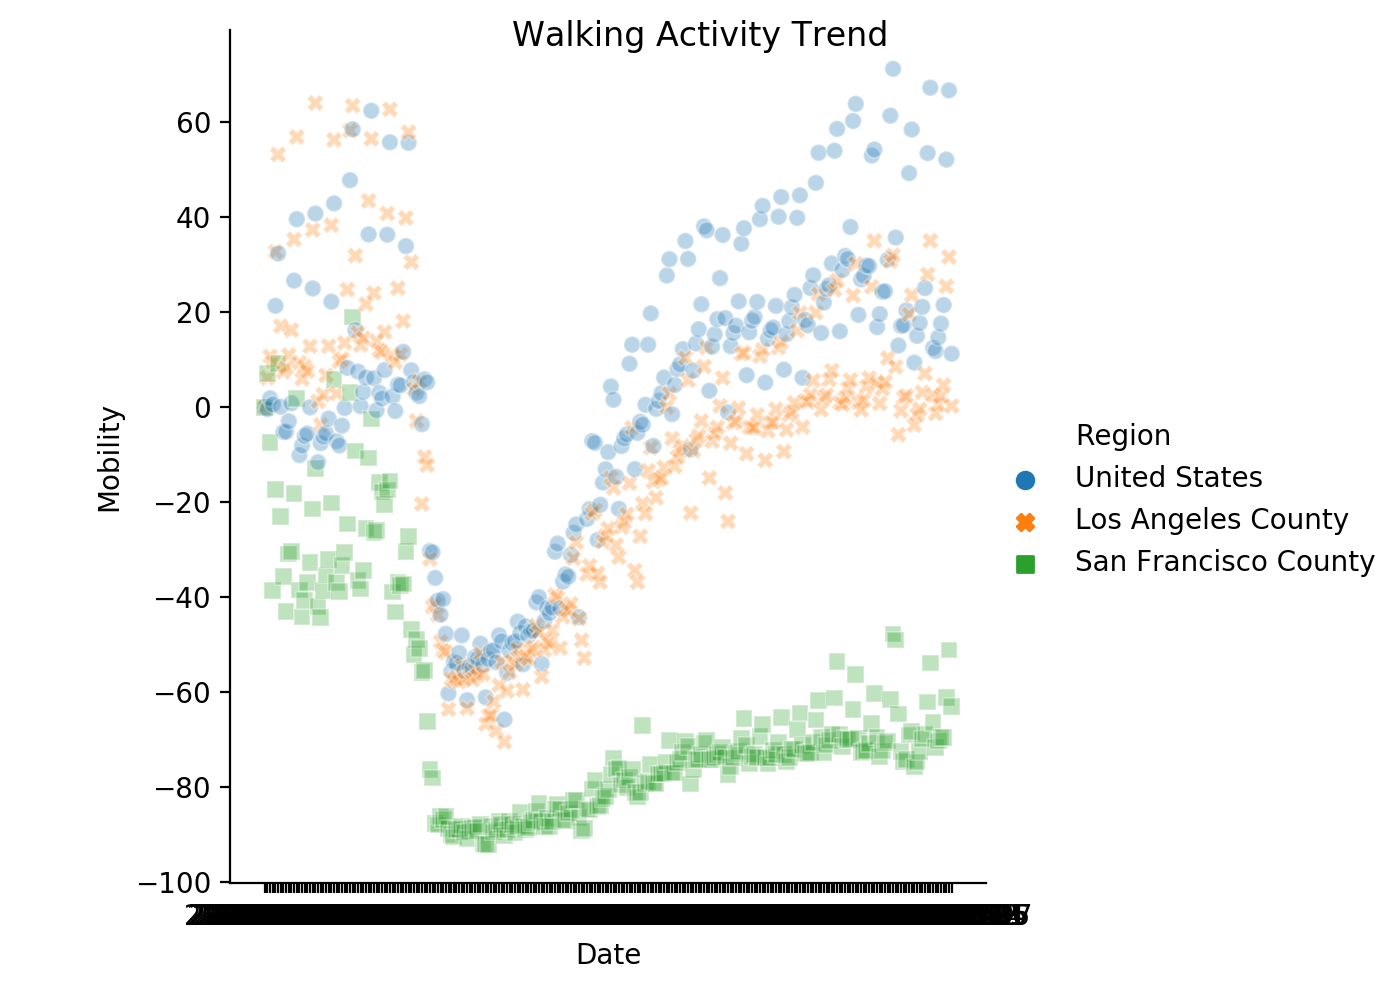

Text(0.5, 0.98, 'Walking Activity Trend')

In [18]:
# Plot for walking
walking_plot = sns.relplot(data=walking_df, x="Date", y="Mobility", hue="Region", kind="scatter", style="Region", alpha=0.3)
walking_plot.fig.suptitle("Walking Activity Trend")

<IPython.core.display.Javascript object>


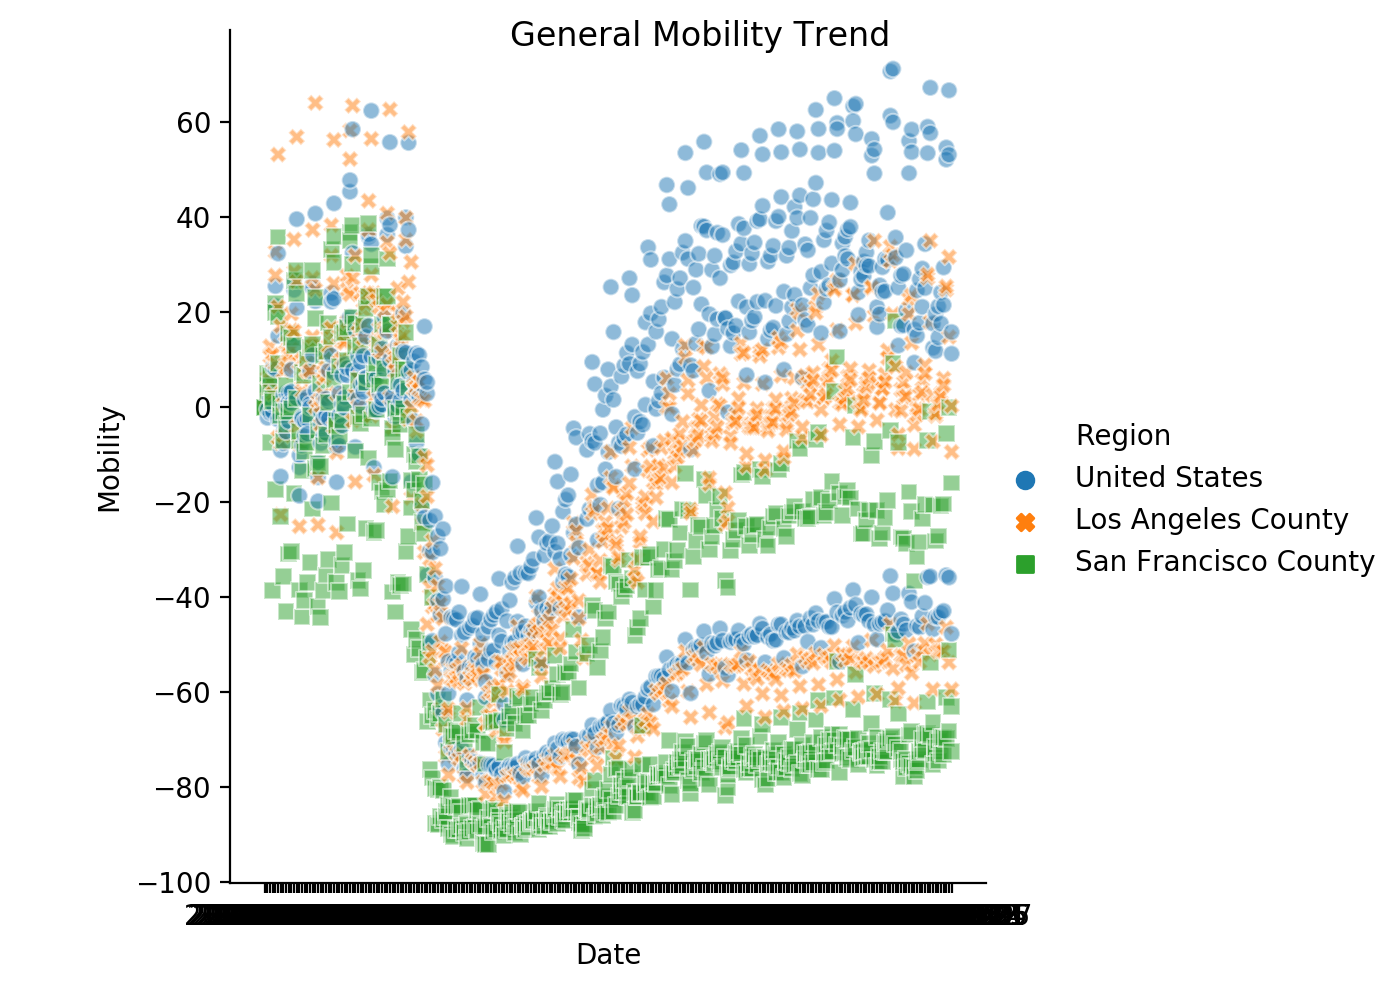

Text(0.5, 0.98, 'General Mobility Trend')

In [19]:
# Plot for general trend
activity_plot = sns.relplot(data=clean_data_long, x="Date", y="Mobility", hue="Region", kind="scatter", style="Region", alpha=0.5)
activity_plot.fig.suptitle("General Mobility Trend")

<IPython.core.display.Javascript object>


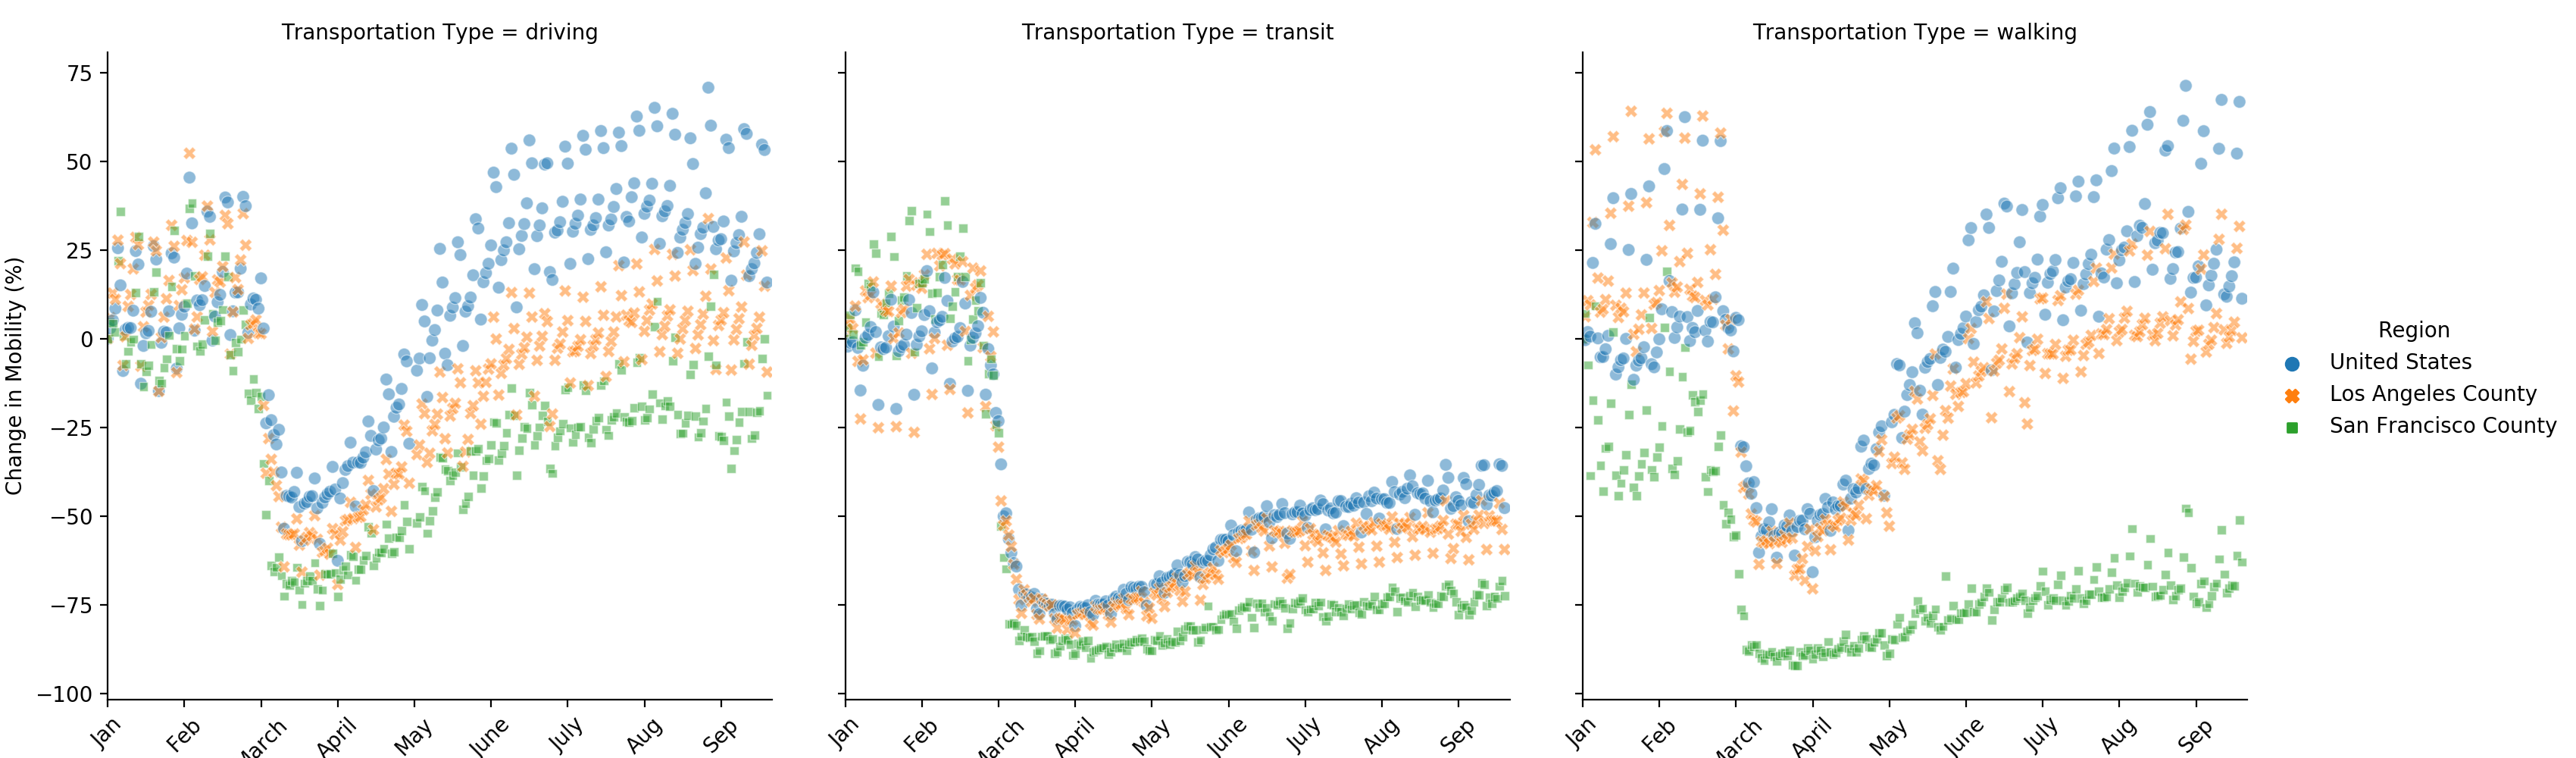

In [14]:
# Plot multiple plots by each mobility trend

all_plot = sns.relplot(data=clean_data_long, x="Date", y="Mobility", col="Transportation Type", hue="Region", style="Region", kind="scatter", alpha=.5)

all_plot.set_axis_labels("Up to: 2020-09-27, source: covid19.apple.com/mobility", "Change in Mobility (%)")
all_plot.set(xlim=(0, 260), xticks=[0,30,60,90,120,150,180,210,240])
all_plot.set_xticklabels(["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep"], rotation=45)

all_plot.savefig("Output/apple_trend.png", dpi = 300)